In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bids = pd.read_csv('data/bids.csv', sep=',')
bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [3]:
bids = pd.read_csv('data/bids_normalized.csv', sep=',')
bids.head()

,bid_id,bidder_id,auction,device,time,country,ip,url,time_normalized,outcome
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3,2419200.0,NaN
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c,2419200.0,0.0
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3,2419200.0,NaN
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3,2419200.0,NaN
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3,2419200.0,NaN


In [4]:
b_train = pd.read_csv('data/b_train.csv', sep=',')
b_train.head(10)

,bidder_id,outcome,mean_time_diff,total_bids_count,total_auctions_count,mean_time_diff2
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,10851.13,24,18,10673.375000
1,624f258b49e77713fc34034560f93fb3hu3jo,0.0,61438.00,3,1,2.666667
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0,45201.00,4,4,219.000000
3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0,NaN,1,1,330.000000
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0,1477.80,155,23,35.206452
5,7eaefc97fbf6af12e930528151f86eb91bafh,0.0,NaN,1,1,0.000000
6,25558d24bca82beef0f9db4ba1fe2045ynnvq,0.0,30379.14,8,8,181.750000
7,88ae7a35e374a6fddd079ebb28c822eeohwse,0.0,3222.55,34,10,148.794118
8,57db69e32163f3e486dc6ef7d615aa12usje6,0.0,1296178.00,2,2,9.000000
9,d1be739798ba0745a1fd72ac918a9f1929hei,0.0,100964.38,14,10,127.428571


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4345a780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10d70f400>]], dtype=object)

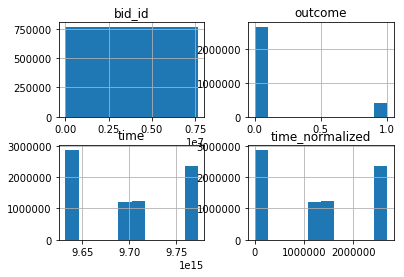

In [5]:
bids.hist()